In [1]:
# uses pyCaret to find optimise model and tune it
# check version
from library.common import Core
core = Core()

from pycaret.utils import version
from pycaret.regression import *
version()

'2.3.5'

In [2]:
# Set up pyCaret Regression
# load dataset
regions_list  = core.list_of_regions
r = 1
cluster = regions_list[r]
print(cluster)

data = core.get_cluster_regression_datas(cluster = cluster, first = core.start_year, last = core.stop_year)
reg0 = setup(data, target = 'co2', session_id=123, log_experiment=True,
             normalize = core.regression_normalize, normalize_method = core.normalize_method,
             remove_outliers = core.remove_outliers, outliers_threshold = core.outliers_threshold,
             verbose = False, silent = core.silent_mode,
             experiment_name= f'carbon emission Cluster {r}')

best_model = compare_models(fold= core.regression_cv, sort = core.error_optimise)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,210.0781,81280.3281,269.8749,0.9922,0.0245,0.0201,0.0560
rf,Random Forest Regressor,276.1683,157493.1339,380.1602,0.9845,0.0332,0.0256,0.0780
dt,Decision Tree Regressor,318.6774,167610.4422,389.2416,0.9838,0.0376,0.0318,0.0080
ada,AdaBoost Regressor,316.6001,167817.9433,397.3585,0.9841,0.0383,0.0319,0.0280
gbr,Gradient Boosting Regressor,285.1258,175493.8488,384.3351,0.9826,0.0335,0.0265,0.0180
br,Bayesian Ridge,524.4792,384550.8815,608.1946,0.9637,0.0637,0.0548,0.0100
llar,Lasso Least Angle Regression,524.2690,395451.1097,617.0247,0.9627,0.0648,0.0546,0.0080
lasso,Lasso Regression,525.0220,400957.0594,621.9067,0.9620,0.0674,0.0553,0.5280
lar,Least Angle Regression,527.6309,417610.5161,634.5763,0.9602,0.0715,0.0566,0.0080
lr,Linear Regression,527.6312,417613.8562,634.5787,0.9602,0.0715,0.0566,1.0020


In [3]:
selected_model = 'et'
model = create_model(selected_model)
tuned_model = tune_model(model, n_iter=100, optimize = core.error_optimise)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,389.7570,370778.7594,608.9161,0.9673,0.0465,0.0332
1,353.5089,350737.1661,592.2307,0.9169,0.0573,0.0367
2,347.2855,159218.8379,399.0224,0.9902,0.0388,0.0381
3,160.6501,32823.1047,181.1715,0.9976,0.0216,0.0189
4,232.8287,77125.7026,277.7151,0.9945,0.0201,0.0185
5,254.9208,66063.1008,257.0274,0.9871,0.0215,0.0211
6,120.6374,15615.0390,124.9601,0.9968,0.0127,0.0127
7,292.1270,164331.8643,405.3787,0.9870,0.0289,0.0231
8,200.9649,67588.4762,259.9778,0.9893,0.0350,0.0238
9,251.3839,77225.8228,277.8953,0.9946,0.0245,0.0241


In [4]:
# selected_model = 'lasso'
# model = create_model(selected_model)
# tuned_model = tune_model(model, n_iter=50, optimize = 'MSE')

In [5]:
# selected_model = 'llar'
# model = create_model(selected_model)
# tuned_model = tune_model(model, n_iter=50, optimize = 'MSE')

In [6]:
tuned_model

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                    max_depth=7, max_features=1.0, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0002,
                    min_impurity_split=None, min_samples_leaf=2,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=50, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

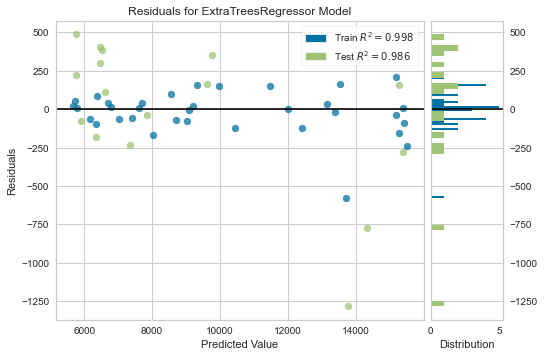

In [7]:
plot_model(tuned_model)

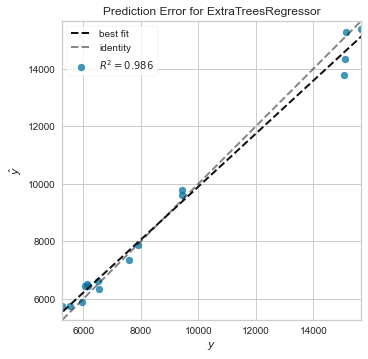

In [8]:

plot_model(tuned_model, plot = 'error')

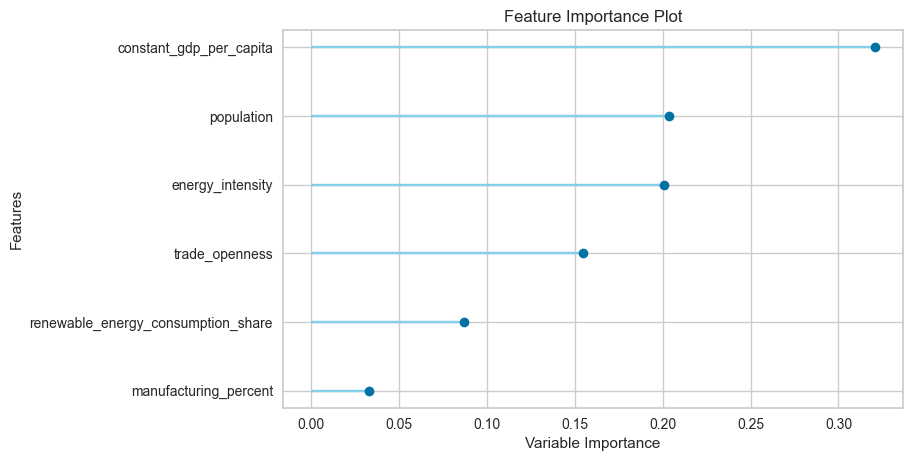

In [9]:

plot_model(tuned_model, plot = 'feature')

In [10]:

evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

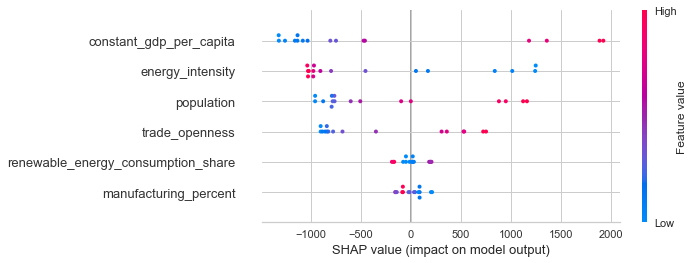

In [11]:
try:
    interpret_model(tuned_model)
except:
    print('No plot for this model')


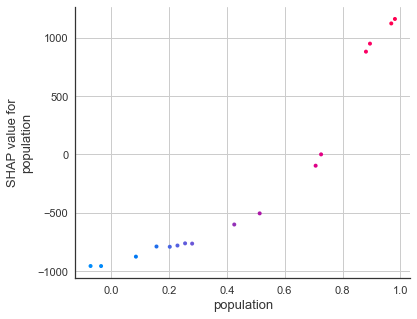

In [12]:
try:
    interpret_model(tuned_model, plot = 'correlation')
except:
    print('No plot for this model')

In [13]:
try:
    interpret_model(tuned_model, plot = 'reason', observation = 12)
except:
    print('No plot for this model')

In [14]:
final_model = finalize_model(tuned_model)
data = core.get_forecasts()
data = data.drop(columns =  ['co2'])
data_unseen = data.loc[data.cluster.eq(cluster),]

# generate predictions on unseen data
predictions = predict_model(final_model, data = data_unseen)
predictions = predictions.rename(columns = {'Label': 'co2'})
predictions[['year', 'co2']]

,year,co2
0,2021,15275.040371
1,2022,15275.040371
2,2023,15141.814346
3,2024,15271.191299
4,2025,15271.191299
